In [803]:
import re
from nltk.util import ngrams
import glob
import environment2
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [804]:
env = environment2.environment2()
user_list_2D = env.user_list_2D


In [805]:
 user_list_experienced=np.array(['data/NDSI-2D\\taskname_ndsi-2d-task_userid_82316e37-1117-4663-84b4-ddb6455c83b2.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_ff56863b-0710-4a58-ad22-4bf2889c9bc0.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_bda49380-37ad-41c5-a109-7fa198a7691a.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_3abeecbe-327a-441e-be2a-0dd3763c1d45.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_6d49fab8-273b-4a91-948b-ecd14556b049.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_954edb7c-4eae-47ab-9338-5c5c7eccac2d.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_a6aab5f5-fdb6-41df-9fc6-221d70f8c6e8.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_8b544d24-3274-4bb0-9719-fd2bccc87b02.csv'])

In [806]:
user_list_first_time=np.setdiff1d(user_list_2D, user_list_experienced)[:6]

In [752]:
user_list_first_time=np.array([


  'data/NDSI-2D\\taskname_ndsi-2d-task_userid_72a8d170-77ae-400e-b2a5-de9e1d33a714.csv',
  'data/NDSI-2D\\taskname_ndsi-2d-task_userid_82316e37-1117-4663-84b4-ddb6455c83b2.csv',
  'data/NDSI-2D\\taskname_ndsi-2d-task_userid_44968286-f204-4ad6-a9b5-d95b38e97866.csv'



])

In [807]:
def get_probab(target ,data):
  p= data.get(target,0)/(data.get(('Navigation', 'Foraging'),0) + data.get(('Navigation', 'Navigation'),0) + data.get(('Navigation', 'Sensemaking'),0))
  return p

In [808]:
#result_dataframe= pd.DataFrame(columns=['User','ROI_Cycle','SouthEast','South','OhioValley','NorthernRockiesPlains','SouthWest','NorthWest','UpperMidwest','Northeast','West','Other','None'])
all_dfs=[]
for u in user_list_first_time:
  print("###########################",u)
  df = pd.read_csv(u)
  df=df[df.State !='Answering']
  u=u.lstrip('data/NDSI-2D\\taskname_ndsi-2d-task_')
  #u=u.lstrip('data/NDSI-3D\\taskname_ndsi-3d-task_')
  u=u.rstrip('.csv')
  one_string = ','.join(((df[df['Subtask_ROI'].isin([1,2])])['State']).tolist())
  tokens = [re.sub(r'[^a-zA-Z0-9\s]', ' ', token) for token in one_string.split(",") if token != ""]
  output = list(ngrams(tokens, 2))+list(ngrams(tokens, 3))
  df = pd.Series(output).value_counts()
  df_last=pd.DataFrame([df])
  print(df_last.head(5))
  df_last['Prob']=get_probab(('Navigation', 'Foraging'),df_last)
  df_last["User"]=u
  df_last['Task']=0
  all_dfs.append(df_last)


########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_44968286-f204-4ad6-a9b5-d95b38e97866.csv
   (Navigation, Navigation)  (Sensemaking, Sensemaking)  \
0                         7                           6   

   (Sensemaking, Sensemaking, Sensemaking)  \
0                                        4   

   (Navigation, Navigation, Navigation)  (Foraging, Foraging)  \
0                                     4                     3   

   (Foraging, Navigation)  (Navigation, Sensemaking, Sensemaking)  \
0                       2                                       2   

   (Navigation, Navigation, Sensemaking)  (Foraging, Navigation, Navigation)  \
0                                      2                                   2   

   (Foraging, Foraging, Foraging)  (Navigation, Sensemaking)  \
0                               2                          2   

   (Foraging, Foraging, Navigation)  (Navigation, Foraging)  \
0                                 1                   

In [809]:
all_user_list_first_time_dfs=[]
for u in user_list_first_time:
  print("###########################",u)
  df = pd.read_csv(u)
  df=df[df.State !='Answering']
  u=u.lstrip('data/NDSI-2D\\taskname_ndsi-2d-task_')
  #u=u.lstrip('data/NDSI-3D\\taskname_ndsi-3d-task_')
  u=u.rstrip('.csv')
  one_string = ','.join(((df[df['Subtask_ROI'].isin([3,4])])['State']).tolist())
  tokens = [re.sub(r'[^a-zA-Z0-9\s]', ' ', token) for token in one_string.split(",") if token != ""]
  output = list(ngrams(tokens, 2))+list(ngrams(tokens, 3))
  df = pd.Series(output).value_counts()
  df_last=pd.DataFrame([df])
  df_last['Prob']=get_probab(('Navigation', 'Sensemaking'),df_last)
  df_last["User"]=u
  df_last['Task']=1
  all_user_list_first_time_dfs.append(df_last)

########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_44968286-f204-4ad6-a9b5-d95b38e97866.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_72a8d170-77ae-400e-b2a5-de9e1d33a714.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_733a1ac5-0b01-485e-9b29-ac33932aa240.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_7d014c75-453b-4188-9e4e-fb086984896a.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_8bf5b71b-dfd4-403f-8791-06427b26ccaf.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_93be0a02-3f7a-46c9-b526-aa956ed00856.csv


In [810]:
final_df=pd.concat([pd.concat(all_dfs),pd.concat(all_user_list_first_time_dfs)])
final_df=final_df.fillna(0)
#,pd.concat(c_all_dfs)

In [811]:
final_df.drop(final_df.index)

,"(Navigation, Navigation)","(Sensemaking, Sensemaking)","(Sensemaking, Sensemaking, Sensemaking)","(Navigation, Navigation, Navigation)","(Foraging, Foraging)","(Foraging, Navigation)","(Navigation, Sensemaking, Sensemaking)","(Navigation, Navigation, Sensemaking)","(Foraging, Navigation, Navigation)","(Foraging, Foraging, Foraging)",...,"(Sensemaking, Navigation)","(Sensemaking, Sensemaking, Navigation)","(Sensemaking, Navigation, Navigation)","(Navigation, Navigation, Foraging)","(Navigation, Foraging, Navigation)",Prob,User,Task,"(Navigation, Foraging, Foraging)","(Navigation, Sensemaking, Navigation)"


In [812]:
final_df.head(20)


,"(Navigation, Navigation)","(Sensemaking, Sensemaking)","(Sensemaking, Sensemaking, Sensemaking)","(Navigation, Navigation, Navigation)","(Foraging, Foraging)","(Foraging, Navigation)","(Navigation, Sensemaking, Sensemaking)","(Navigation, Navigation, Sensemaking)","(Foraging, Navigation, Navigation)","(Foraging, Foraging, Foraging)",...,"(Sensemaking, Navigation)","(Sensemaking, Sensemaking, Navigation)","(Sensemaking, Navigation, Navigation)","(Navigation, Navigation, Foraging)","(Navigation, Foraging, Navigation)",Prob,User,Task,"(Navigation, Foraging, Foraging)","(Navigation, Sensemaking, Navigation)"
0,7,6.0,4.0,4,3.0,2,2.0,2,2,2.0,...,1.0,1.0,1.0,1.0,1.0,0.100000,userid_44968286-f204-4ad6-a9b5-d95b38e97866,0,0.0,0.0
0,9,3.0,1.0,6,5.0,2,2.0,2,2,4.0,...,1.0,1.0,1.0,1.0,1.0,0.083333,userid_72a8d170-77ae-400e-b2a5-de9e1d33a714,0,0.0,0.0
0,7,16.0,14.0,5,0.0,1,2.0,2,1,0.0,...,1.0,1.0,1.0,0.0,0.0,0.000000,userid_733a1ac5-0b01-485e-9b29-ac33932aa240,0,0.0,0.0
0,15,10.0,9.0,7,25.0,7,1.0,2,7,21.0,...,1.0,0.0,1.0,6.0,2.0,0.260870,userid_7d014c75-453b-4188-9e4e-fb086984896a,0,4.0,1.0
0,7,8.0,6.0,4,2.0,2,2.0,2,2,1.0,...,1.0,1.0,1.0,1.0,1.0,0.100000,userid_8bf5b71b-dfd4-403f-8791-06427b26ccaf,0,0.0,0.0
0,12,6.0,4.0,9,3.0,2,2.0,2,2,1.0,...,1.0,1.0,1.0,1.0,0.0,0.066667,userid_93be0a02-3f7a-46c9-b526-aa956ed00856,0,1.0,0.0
0,14,0.0,0.0,10,3.0,2,0.0,2,2,1.0,...,1.0,0.0,1.0,2.0,0.0,0.111111,userid_44968286-f204-4ad6-a9b5-d95b38e97866,1,2.0,1.0
0,13,1.0,0.0,9,3.0,2,1.0,2,2,1.0,...,1.0,1.0,1.0,2.0,0.0,0.117647,userid_72a8d170-77ae-400e-b2a5-de9e1d33a714,1,2.0,0.0
0,4,1.0,0.0,2,6.0,1,1.0,1,1,5.0,...,0.0,0.0,0.0,1.0,0.0,0.166667,userid_733a1ac5-0b01-485e-9b29-ac33932aa240,1,1.0,0.0
0,4,13.0,11.0,1,2.0,1,2.0,2,1,1.0,...,1.0,1.0,1.0,1.0,0.0,0.285714,userid_7d014c75-453b-4188-9e4e-fb086984896a,1,1.0,0.0


In [813]:
column_names = list(final_df.columns.values)
column_names = [e for e in column_names if e not in ('Task', 'User','Prob')]

In [814]:
final_df_copy=final_df.drop(['User'], axis=1)

In [815]:
X_train, X_test, y_train, y_test = train_test_split(final_df_copy[column_names], final_df_copy['Task'], test_size = 0.05, random_state = 42)

C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [816]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [817]:
y_pred_en = dtree.predict(X_test)

C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [818]:
print('Model accuracy score with criterion Gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion Gini: 1.0000


In [819]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix: tn, fp,fn,tp\n\n', cm.ravel())

Confusion matrix: tn, fp,fn,tp

 [1]


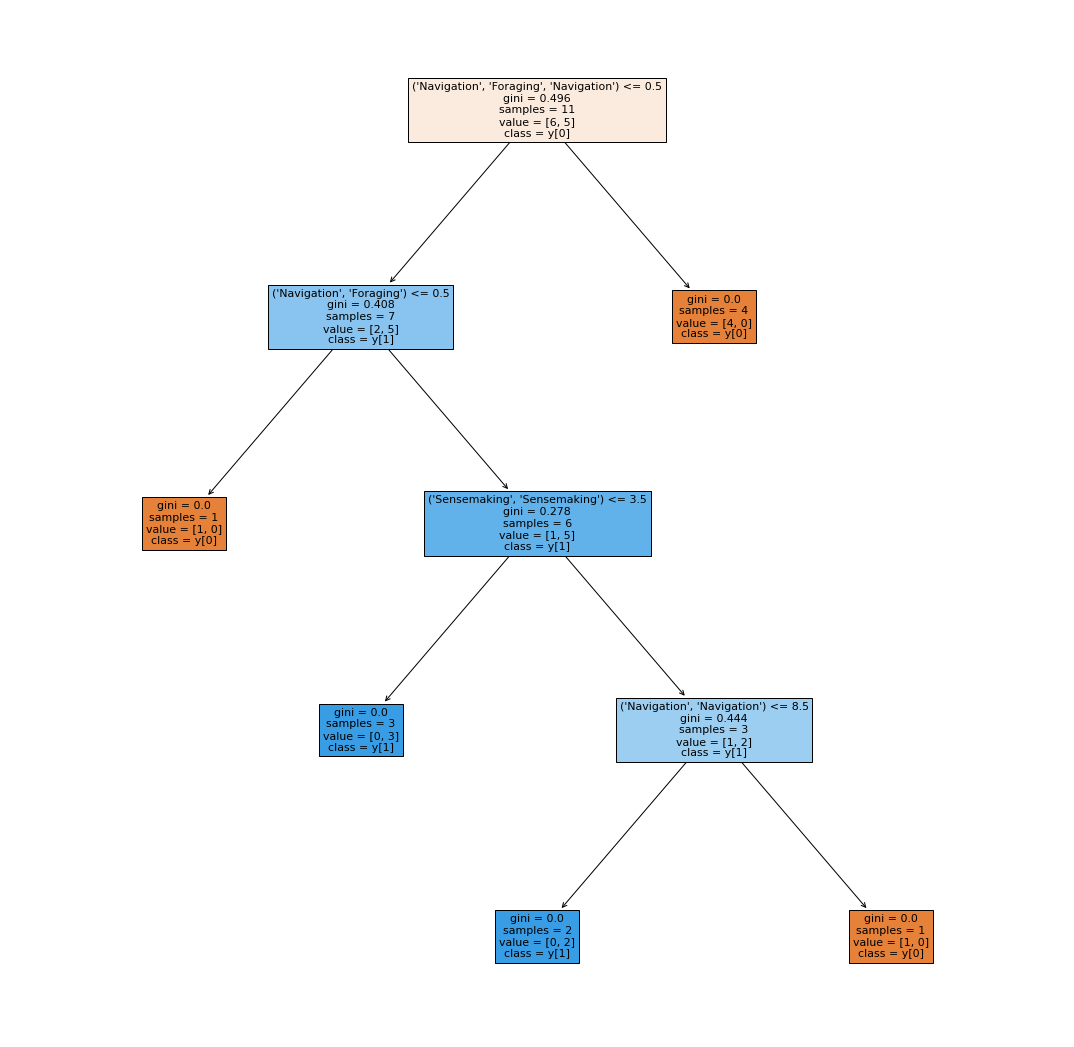

In [820]:
import time
plt.figure(figsize=(19,19))  # set plot size (denoted in inches)
tree.plot_tree(dtree, feature_names=column_names, class_names=True,filled=True, fontsize=11)
filename= "tree" + str(time.time()) + str(".jpg")
plt.savefig(filename,format='jpg',bbox_inches = "tight")
plt.show()